MovieWriter imagemagick unavailable; using Pillow instead.
2024-01-10 17:48:09.388112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


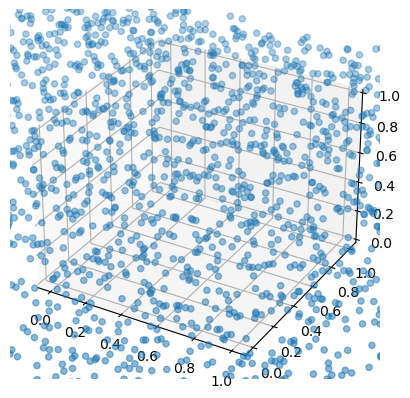

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import tensorflow as tf
from tensorflow.keras import layers

# Define a neural network architecture with multiple inputs and outputs
def build_model():
    model = tf.keras.Sequential([
        layers.Input(shape=(2,)),  # Two input features
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(2, activation='linear')  # Two output neurons
    ])
    return model

# Create sample input ranges
input_range1 = np.linspace(-5, 5, 100)
input_range2 = np.linspace(-3, 3, 100)
input_meshgrid = np.meshgrid(input_range1, input_range2)
input_samples = np.vstack([input_meshgrid[0].flatten(), input_meshgrid[1].flatten()]).T

# Build the neural network
model = build_model()

# Create a figure and axis for plotting
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
scatter = ax.scatter([], [], [], marker='o')

# Function to initialize the plot
def init():
    scatter._offsets3d = ([], [], [])
    return scatter,

# Function to update the plot at each iteration
def update(frame):
    inputs = input_samples + np.random.normal(0, 0.1, size=input_samples.shape)  # Add noise for better visualization
    predictions = model.predict(inputs)

    # Update the scatter plot with the new predictions
    scatter._offsets3d = (inputs[:, 0], inputs[:, 1], predictions[:, 0])
    
    return scatter,

# Create the animation
animation = FuncAnimation(fig, update, frames=range(50), init_func=init, blit=True)

# Save the animation as a GIF
animation.save('multi_input_output_animation.gif', writer='imagemagick', fps=5)

plt.show()
